### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [14]:
import numpy as np

m = np.arange(12).reshape((3, 4))
print(m)
print("The overall mean is:", np.mean(m))
print("The rows mean are:", np.mean(m, axis=1))
print("The columns mean are:", np.mean(m, axis=0))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
The overall mean is: 5.5
The rows mean are: [1.5 5.5 9.5]
The columns mean are: [4. 5. 6. 7.]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [33]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u, v), "\n") #See how this function work in the Numpy website
print(np.array([u*v[i] for i in range(4)]), "\n")
print(u[:, np.newaxis]*v) #This works because I added a new dimention and the moltiplication is done for each element 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [ ]:
import numpy.random as npr
npr.seed(123)
matrix = npr.random((10, 6))

mask = (matrix < 0.1).any(axis=1)
matrix[mask, :] = 0 #This is a very important example on how masks work in python

print(matrix)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.         0.         0.         0.         0.         0.        ]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.         0.         0.         0.         0.         0.        ]
 [0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184 ]
 [0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979]
 [0.51948512 0.61289453 0.12062867 0.8263408  0.60306013 0.54506801]
 [0.34276383 0.30412079 0.41702221 0.68130077 0.87545684 0.51042234]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [98]:
from math import pi
a = np.linspace(0, 2*pi, 101)
b = a[::10]
c = a[::-1]
d = a[np.abs(np.sin(a) - np.cos(a)) < 0.1] #Use numpy functions to work on arrays

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [100]:
table = np.outer(np.arange(1, 11), np.arange(1, 11))
#diagonal = np.array([table[i,i] for i in range(10)])
print(np.trace(table))
#antidiagonal = np.array([table[i,9 - i] for i in range(10)])
print(np.diag(table[::-1]))
#diagonal1 = np.array([table[i,i + 1] for i in range(9)])
print(np.diag(table, 1))

385
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [ ]:
cities = np.array(["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"])
positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

#To do


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [130]:
import timeit

N = 100
numbers = np.arange(N)
mask = np.ones((N,), dtype = bool)
for i in range(2, N):
    for j in range(i, N):
        k = j*i
        if (k > N-1): 
            break
        else: 
            mask[k] = False

print(numbers[mask])


[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]


In [134]:
mysetup = """import numpy as np"""

firstversion = """N = 10000
numbers = np.arange(N)
mask = np.ones((N,), dtype = bool)
for i in range(2, N):
    for j in range(i, N):
        k = j*i
        if (k > N-1): 
            break
        else: 
            mask[k] = False"""
print(timeit.timeit(stmt=firstversion, setup=mysetup, number=1000))

10.606215200037695


In [ ]:
N = 100
mask = np.ones(N, dtype=bool)
mask[0:2] = False  

limit = int(np.sqrt(N)) + 1 #With this I stop the algotithm once it reaches the starting poin N = rad(N)*rad(N) - see below

for i in range(2, limit):
    if mask[i]:
        mask[i*i : N : i] = False #This version that is written with slices is much more efficient 

print(np.nonzero(mask)[0]) #The nonzero function return a tuple of arrays with the indeces of the position in which there is a nonzero number
#In this case, using mask corresponds to telling the function "the positions with true are the one with nonzero values", even though in this case
#I am checking for prime numbers. In fact, in boolean algebra, True = 1 and False = 0. 
#Then I select the first element of the tuple since my array is 1D, thus I only need the row indeces

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [1]:
import numpy.random as npr
import numpy as np
import copy

trajectories = npr.choice((-1, 1), (1000, 200))
distances = np.cumsum(trajectories, axis=1)
squaredist = distances**2
squaremean = np.mean(squaredist, axis=0)

#Do the plot

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

['#' 'year' 'hare' 'lynx' 'carrot']


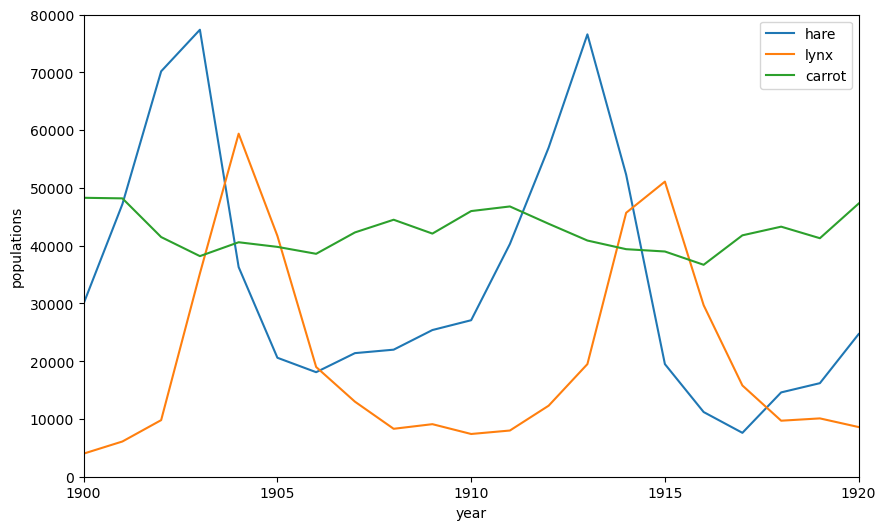

In [30]:
#Use this one for windows:
#curl.exe -L -o populations.txt "https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt?raw=1"
import numpy as np
import matplotlib.pyplot as plt

with open('populations.txt', 'r') as f:
    header_str = f.readline().strip().split() #This reads the head line in the file, in which there are the names 

header_arr = np.array(header_str) 

df = np.loadtxt("populations.txt")
print(header_arr)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(df[:, 0], df[:, 1], label="hare");  
ax.plot(df[:, 0], df[:, 2], label="lynx"); 
ax.plot(df[:, 0], df[:, 3], label="carrot"); 
ax.set_xbound(1900, 1920); ax.set_ybound(0, 80000) 
ax.set_xlabel("year"); ax.set_ylabel("populations"); ax.set_xticks(ticks=np.linspace(1900, 1920, 5))
ax.legend(loc='upper right')

years, hares, lynxes, carrots = df[:, 0], df[:, 1], df[:, 2], df[:, 3] #these are views
stds = np.apply_along_axis(np.std, axis=0, arr=df[:, 1:]) #axis = 0 -> columns 
means = np.apply_along_axis(np.mean, axis=0, arr=df[:, 1:])
cov = np.cov(df[1:, :].T) #Here the rows indicates the variables
indexmax = np.apply_along_axis(np.argmax, axis=1, arr=df[:, 1:]) + 2 #axis = 1 -> rows. The +2 is necessary to cancel the offset between the indexes, which start from 0 in this new array
highest = np.column_stack((df[:, 0], header_arr[indexmax]))
#print(highest)